## Epidemics Theory

### The SI Model

\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta s(t)i(t)\\
   \cfrac{di(t)}{dt} = \beta s(t)i(t)
  \end{cases}
  \\
  i(t) + s(t) = 1
\end{equation}


**人群中有两种人：易感人群，感染人群， - 如果感染者不能够被治愈，且感染人群初始值不为0， 最终将全部感染**    

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.core.pylabtools import figsize
%matplotlib inline

In [0]:
# system of differential equations..
def si(z, t, beta):
    return np.array([
        -beta * z[1] * z[0],
         beta * z[1] * z[0]])


def si_model(beta = 0.2,i0 = 0.6):

    # initial state
    z0 = [1-i0, i0]

    # time domain
    t = np.arange(50)

    # solved
    return odeint(si, z0, t, (beta,))


def sis(z,t,beta,gamma):
    return np.array([
        -beta * z[1] * z[0] + gamma * z[1],
         beta * z[1] * z[0] - gamma * z[1]
    ])


def sis_model(beta = 0.3, gamma = 0.2, i0 = 0.6):
    # initial state
    z0 = [1-i0, i0]

    # time domain
    t = np.arange(50)

    # solved
    return odeint(sis, z0, t, (beta,gamma))




# system of differential equations..
def sir(z, t, beta, gamma):
    return np.array([
        -beta * z[1] * z[0],
         beta * z[1] * z[0] - gamma * z[1],
         gamma * z[1]])

def sir_model(beta = 2, gamma = 0.6,i0 = 0.2,r0 = 0):

    z0 = [1-i0-r0, i0, r0]

    # time domain
    t = np.arange(50)
    # solved
    return odeint(sir, z0, t, (beta,gamma))


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


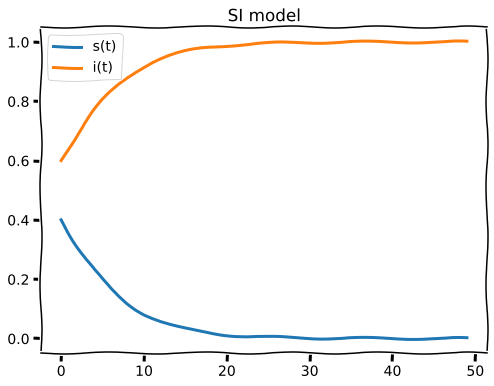

In [0]:
z = si_model()
plt.xkcd()
figsize(8,6)
plt.plot(z[:,0],label = 's(t)',linewidth=  3)
plt.plot(z[:,1],label = 'i(t)',linewidth=  3)
plt.legend()
plt.title("SI model")
plt.show()

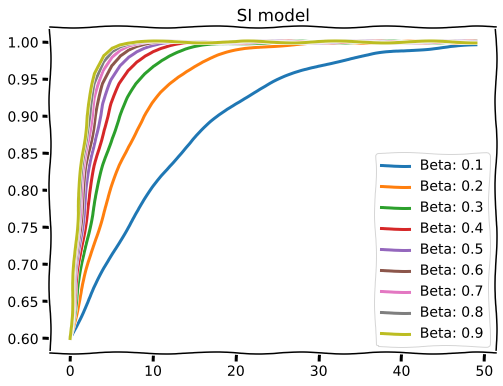

In [0]:
results = {round(bet,2):si_model(beta = round(bet,2)) for bet in np.arange(0.1,1,0.1)}
for beta, z in results.items():
    plt.plot(z[:,1],linewidth=  3,label = 'Beta: {}'.format(beta))
plt.legend()
plt.title("SI model")
plt.show()

### The SIS Model

\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta s(t)i(t) + \gamma i(t)\\
   \cfrac{di(t)}{dt} = \beta s(t)i(t) - \gamma i(t)
  \end{cases}
  \\
  i(t) + s(t) = 1
\end{equation}


**感染人群总会变好，至少有一个susceptible存在的感觉**     
**感染人群和易感染人群存在一个平衡**    
**1. 所有人都好了（Susptible）-- beta < gamma**    
**2. 一直处在某种平衡中 -- beta >  gamma**    

**<font color='darkred'>当时间趋于无穷的时候，感染人群与易感人群的比例会保持为常数</font>**


    

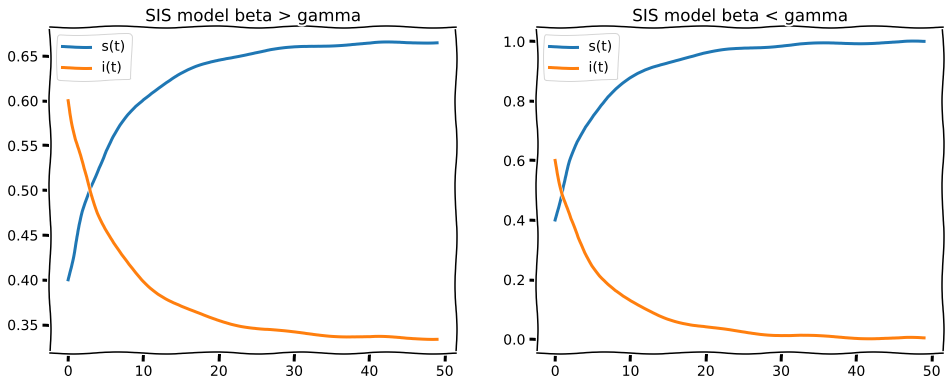

In [0]:
z = sis_model(beta = 0.3, gamma = 0.2,i0 = 0.6)
z1 = sis_model(beta = 0.2, gamma = 0.3,i0 = 0.6)

plt.xkcd()
figsize(16,6)
plt.subplot(1,2,1)
plt.plot(z[:,0],label = 's(t)',linewidth=  3)
plt.plot(z[:,1],label = 'i(t)',linewidth=  3)
plt.legend()
plt.title("SIS model beta > gamma")

plt.subplot(1,2,2)
plt.plot(z1[:,0],label = 's(t)',linewidth=  3)
plt.plot(z1[:,1],label = 'i(t)',linewidth=  3)
plt.legend()
plt.title("SIS model beta < gamma")
plt.show()

### The SIR model
Suseptible, Infected, Recovered

\begin{equation}
   \begin{cases}
   \cfrac{ds(t)}{dt} = -\beta s(t)i(t)\\
   \cfrac{di(t)}{dt} = \beta s(t)i(t) - \gamma i(t)\\
   \cfrac{dr(t)}{dt} = \gamma i(t)
  \end{cases}
  \\
  i(t) + s(t) + r(t) = 1
\end{equation}



**Case 1: 所有人的人都病了，最后都恢复了，所有的人最终都是R**    
**Case 2: 有一部分人病了，然后好了，有一部分人从来没有生病，最终一部分S和一部分R**

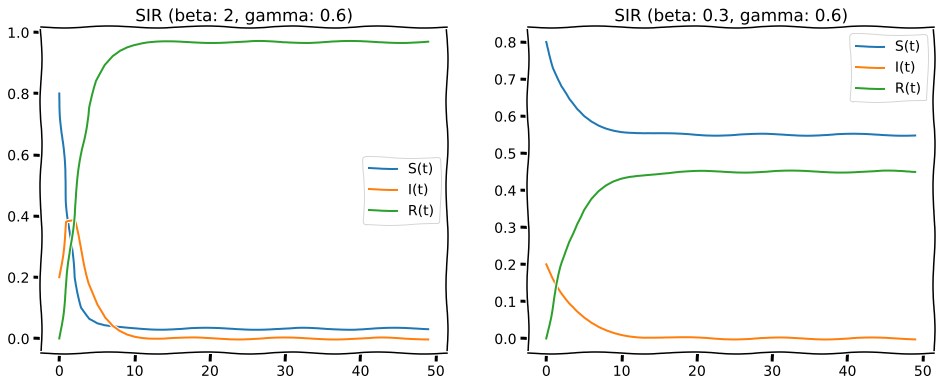

In [0]:
z = sir_model(beta = 2, gamma = 0.6,i0 = 0.2,r0 = 0)
s,i,r = z[:,0],z[:,1],z[:,2]

plt.subplot(1,2,1)
plt.plot(s,label = 'S(t)')
plt.plot(i,label = 'I(t)')
plt.plot(r,label = 'R(t)')
plt.legend()
plt.title('SIR (beta: 2, gamma: 0.6)')


z = sir_model(beta = 0.5, gamma = 0.6,i0 = 0.2,r0 = 0)
s,i,r = z[:,0],z[:,1],z[:,2]

plt.subplot(1,2,2)
plt.plot(s,label = 'S(t)')
plt.plot(i,label = 'I(t)')
plt.plot(r,label = 'R(t)')
plt.legend()
plt.title('SIR (beta: 0.3, gamma: 0.6)')


plt.show()

### Analysis of SIR model

**方程有1 - 2 个解，其中一个是r_infinity = 0, 另一个解是否存在，取决于 R0 = beta / gamma**

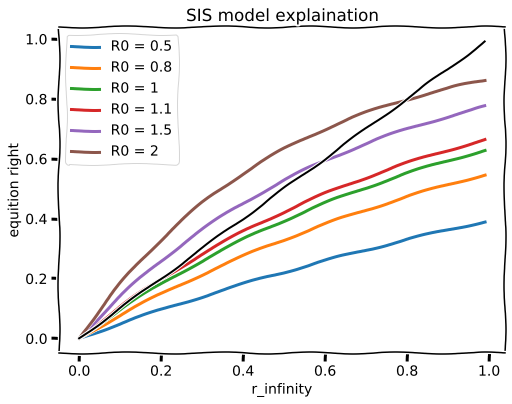

In [0]:
figsize(8,6)
r_inf = np.arange(0,1,0.01)
for ratio in [0.5,0.8,1,1.1,1.5,2]:    
    val = 1 - np.exp(-ratio * r_inf)
    plt.plot(r_inf,val,label = 'R0 = {}'.format(str(ratio)),linewidth = 3)

plt.plot(r_inf,r_inf,color = 'black')
plt.legend()
plt.title('SIS model explaination')
plt.xlabel('r_infinity')
plt.ylabel('equition right')
plt.show()


**模型解释**

$R0 = \beta / \gamma$

$1 - r_{\infty} = s_{0} e^{-\frac{\beta}{\gamma}  r_{\infty}}$

考虑 $r(0) = 0, i(0) = c/N, s(0) = 1- c/N \approx 1$

$1 - r_{\infty} = e^{-\frac{\beta}{\gamma}  r_{\infty}}$

$r_{\infty} = 1 - e^{-\frac{\beta}{\gamma}  r_{\infty}}$


R0 > 1, $\beta > \gamma, r_{\infty} = const > 0$        
R0 < 1, $\beta < \gamma, r_{\infty} \to 0$

这就是为什么两种情况相差很大了      


**如果恢复的速度快，最终没有几个人会得病**     
**如果恢复的速度慢，最终有一定比例的会恢复，一部分人从未感染，恢复人群的数量取决于感染和恢复速度的比值**

**这个$R0$就叫做Epedemic threshhold - basic reproduction number**    


**意义： Number of people infected by a person before his recovery**



### Simulate branching spread

In [0]:
def get_conn_nodes(nodes,k = 3):
    '''Return new node ids for a give node list, limit to k new nodes'''
    return list(range(len(nodes) + 1, len(nodes) + k + 1))


def simulate_branching_tree(levels = 5, k = 3, return_graph = True):
    '''
        Simulate a branching tree for 'level' layers, each node connected to k nodes in subsequent layer
    '''

    nodes = []
    tree = {}
    edges = []

    for level in range(levels):
        if level == 0:
            nodes.append(1)
            tree[level] = [1]
        else:
            level_nodes = []
            for n in tree[level -1]:
                connected_nodes = get_conn_nodes(nodes,k)
                nodes+=connected_nodes
                _ = [edges.append((n,nei)) for nei in connected_nodes]
                level_nodes+= connected_nodes
            tree[level] = level_nodes

    if return_graph:
        return nx.from_edgelist(edges)
    
    return edges


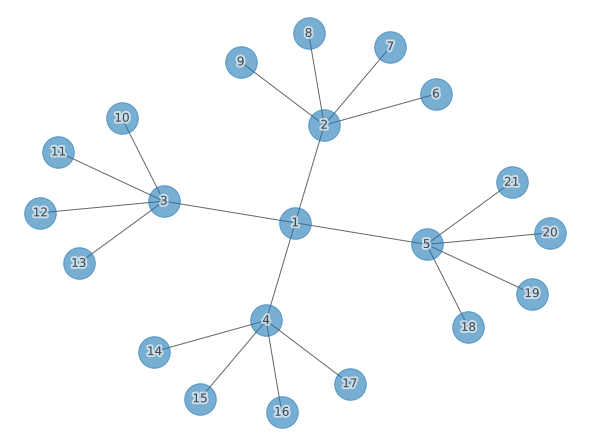

In [0]:
import networkx as nx
level = 3
k = 4
G = simulate_branching_tree(level,k,True)
nx.draw(G,alpha = 0.6,pos = nx.kamada_kawai_layout(G),with_labels = True,node_size = 1000)

In [0]:
def start_infection(G,infection_level = 2,start_node = 1,p_thresh = 0.4,k = 4):

    # initialize infected nodes and visited nodes
    all_infected = [start_node]
    visited_nodes = []

    # diffusion spread for multiple levels
    for lvl in range(infection_level):

        # loop through infected but not visited
        loop_nodes = set(all_infected).difference(set(visited_nodes))

        # each node infect downstream neighbors
        for n in loop_nodes:
            visited_nodes.append(n)

            # downstream limit
            node_candidates = np.array([nei for nei in list(G.neighbors(n)) if nei > n])

            if len(node_candidates) >0:
                # probability vector to screen candidates
                p = np.random.random(size = k)
                all_infected += node_candidates[np.where(p < p_thresh)].tolist()
    return all_infected

### Branching epidemics simulation - 传染病或者发展下线的传销

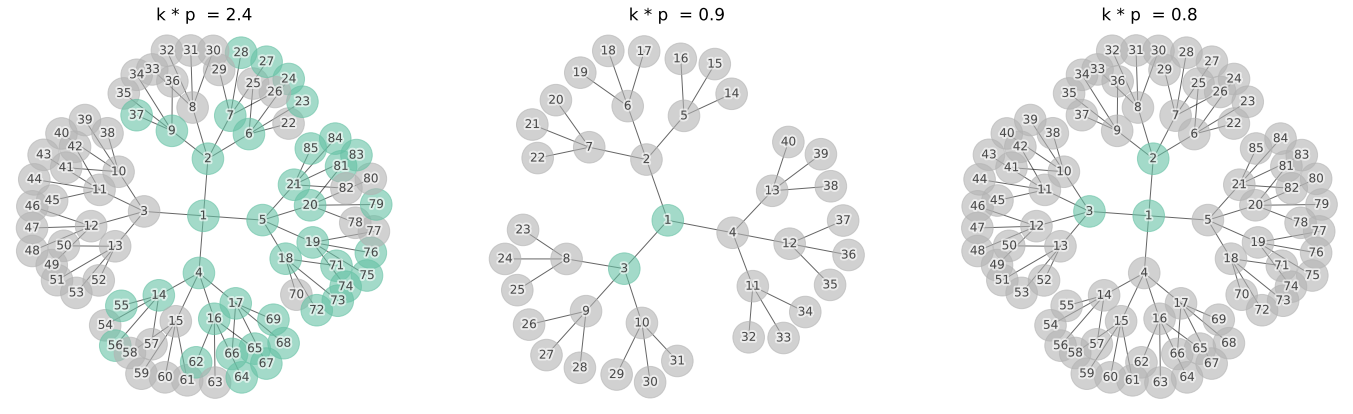

In [257]:
parameters = [(4,4,1,0.6), (4,3,1,0.3),(4,4,1,0.2)]
n_graphs = len(parameters)

figsize(n_graphs * 8,7)
for i, (level, k, start_node, p_thresh) in enumerate(parameters):
    G = simulate_branching_tree(level,k,True)
    all_infected = start_infection(G,level - 1,start_node,p_thresh,k)
    colors = [1 if n in all_infected else 2 for n in G.nodes()]

    plt.subplot(1,n_graphs,i + 1)
    nx.draw(G,
            alpha = 0.6,
            node_color = colors,
            pos = nx.kamada_kawai_layout(G),
            with_labels = True,
            node_size = 1000,
            cmap = plt.get_cmap('Set2'))
    
    plt.title('k * p  = {}'.format(round(k*p_thresh,2)))
plt.show()

### 传染概率 *  接触人数 < 1, 可以控制传染病 

**最后还有一些理论可以继续从Zhukov的第12课继续学习**